In [1]:
# for importing data
import pandas as pd
import numpy as np
import os

# for EDA
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline   
from collections import Counter

In [2]:
# Use cleaner absolute path to find file
path = os.path.abspath('politifact_cleaned_data.csv')
df = pd.read_csv(path, index_col=0)

# to see statement in full
pd.set_option('display.max_colwidth', 200) 

# See sample of data
df.head(3)

,date,source,freq,statement,veracity
18,2019-10-23,Jeremy Thiesfeldt,1,"""The vast majority of Wisconsin students cannot even read, write, or do math at grade level.""",False
21,2019-10-22,Brett McGurk,1,"""President Trump has sent 14,000 American troops to the (Middle East) region since May. So he can't tell his political rallies that he's getting troops out of endless wars when he's sending 14 tim...",True
27,2019-10-21,Beto O'Rourke,3,"""To be clear, I’m not talking about confiscating anybody’s guns.""",False


In [3]:
df.veracity.value_counts()

False             576
True              571
Pants on Fire!    308
Name: veracity, dtype: int64

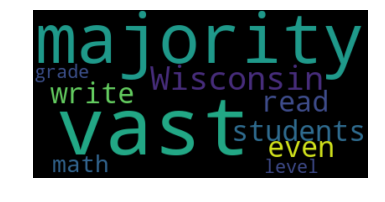

In [4]:
# generate word cloud from first statement we have (#18)
text = df.statement[18]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Uncomment to save file
#wordcloud.to_file("all_doc_cloud.png")

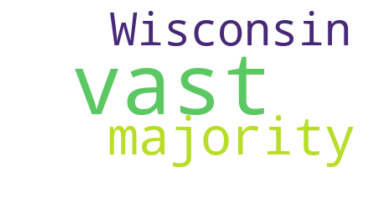

In [5]:
# changed: 
# font_size, 
# maximum number of words,
# and background

wordcloud = WordCloud(min_font_size=30, 
                      max_font_size=100, 
                      max_words=20, 
                      background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are 151823 words in the combination of all statements.


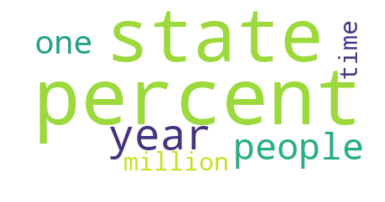

In [6]:
# Combine documents
text = " ".join( _ for _ in df.statement)
print ("There are", len(text) ,"words in the combination of all statements.")

# Generate image
wordcloud = WordCloud(min_font_size=24, 
                      max_font_size=1000, 
                      max_words=100, 
                      background_color="white").generate(text)

# Display image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
# to generate wordclouds for each category of veracity
trues = df[df.veracity == "True"]
falses = df[df.veracity == "False"]
fires = df[df.veracity == "Pants on Fire!"]

In [8]:
trues.head(3)

,date,source,freq,statement,veracity
21,2019-10-22,Brett McGurk,1,"""President Trump has sent 14,000 American troops to the (Middle East) region since May. So he can't tell his political rallies that he's getting troops out of endless wars when he's sending 14 tim...",True
61,2019-10-10,David McKinley,1,"""About 95 percent of America’s production of ethylene is produced on the Gulf Coast in Texas and Louisiana.""",True
64,2019-10-10,Josh Hawley,1,"""Meth production in MO has cratered over last decade. MO Hwy Patrol reported 1,326 meth lab seizures in 2006, only 50 in 2018.""",True


In [9]:
falses.head(3)

,date,source,freq,statement,veracity
18,2019-10-23,Jeremy Thiesfeldt,1,"""The vast majority of Wisconsin students cannot even read, write, or do math at grade level.""",False
27,2019-10-21,Beto O'Rourke,3,"""To be clear, I’m not talking about confiscating anybody’s guns.""",False
42,2019-10-16,Julián Castro,3,"""Ohio, Michigan, and Pennsylvania actually in the latest jobs data have lost jobs, not gained them.""",False


In [10]:
fires.head(3)

,date,source,freq,statement,veracity
30,2019-10-18,Eric Trump,1,"""When my father became commander in chief of this country, we got out of all international business.""",Pants on Fire!
76,2019-10-04,Roger Williams,1,"""50% of the DUIs on Interstate 35 are from illegals. Ninety percent of the 50% have absolutely no identification.""",Pants on Fire!
85,2019-10-02,Kaya Jones,1,"""If the impeachment reaches the house and passes to the senate and isn’t passed the first term is nullified and Trump can run two more terms.""",Pants on Fire!


In [11]:
# wordcloud function for readability
def word_cloud(column):
    
    # Combine documents
    text = " ".join( _ for _ in column)
    
    # Sanity check
    print ("There are", len(text) ,"words")

    # Generate image
    plt.figure(figsize=(12, 10))
    wordcloud = WordCloud(min_font_size=5, 
                          max_font_size=60, 
                          max_words=20, 
                          background_color="white").generate(text)

    # Display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# True Statement Word Cloud

There are 62723 words


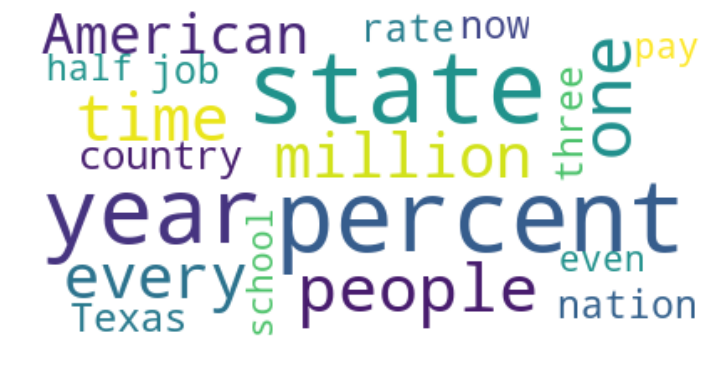

In [12]:
word_cloud(trues.statement)

# False Statement Word Cloud

There are 60153 words


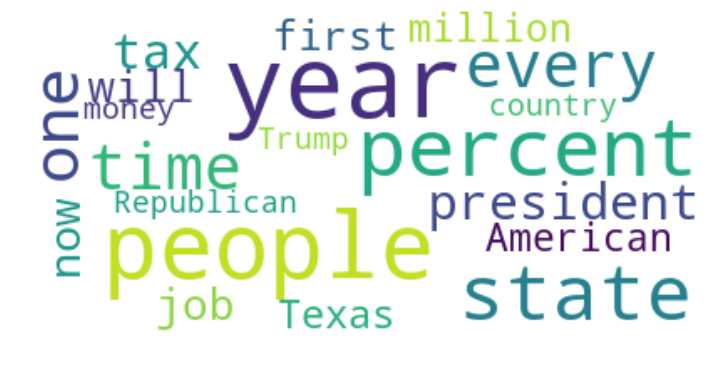

In [13]:
word_cloud(falses.statement)

# Pants-on-Fire! Statement Word Cloud

There are 28945 words


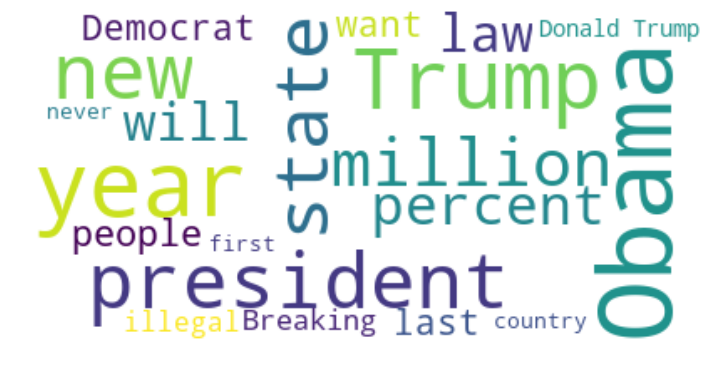

In [14]:
word_cloud(fires.statement)

# I find it odd that all clouds contain the words year and percent
# Let's verify with another method

In [15]:
# counter func and list of words to check
def cnt(col,r):
    # returns total # of times word occured in all statements
    return Counter(col.statement.str.contains(r))[True]

lst = [r"year", r"percent", r"state", r"American", r"half", r"Trump"]

In [16]:
# for loop func
def freq_check(df):
    # returns word and its frequency
    for r in lst:
        print(r, "freq :", cnt(df, r))

In [17]:
freq_check(trues)

year freq : 85
percent freq : 72
state freq : 76
American freq : 32
half freq : 21
Trump freq : 7


In [18]:
freq_check(falses)

year freq : 72
percent freq : 53
state freq : 40
American freq : 20
half freq : 9
Trump freq : 18


In [19]:
freq_check(fires)

year freq : 23
percent freq : 14
state freq : 14
American freq : 8
half freq : 4
Trump freq : 29


# results of the wordcloud were verified
# lemmatization, etc. may change results